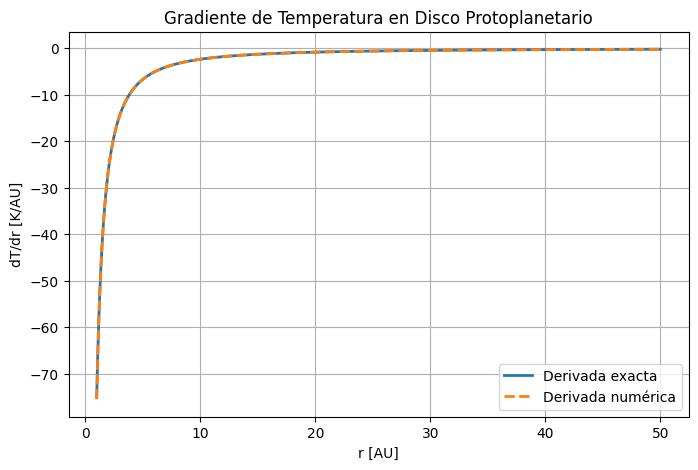

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos del modelo
T0 = 150     # Temperatura en r0 [K]
r0 = 1       # Radio de referencia [AU]
q = 0.5      # Exponente

# Definición de función de temperatura
def T(r):
    return T0 * (r / r0)**(-q)

# Derivada analítica
def dT_dr_exact(r):
    return -q * T0 / r0 * (r / r0)**(-q - 1)

# Derivada centrada
def dT_dr_central(f, r, h):
    return (f(r + h) - f(r - h)) / (2 * h)

# Rango de radios
r_vals = np.linspace(1, 50, 500)
h = 0.1

# Cálculo de derivadas
T_vals = T(r_vals)
dT_num = dT_dr_central(T, r_vals, h)
dT_exact = dT_dr_exact(r_vals)

# Gráfico de comparación
plt.figure(figsize=(8,5))
plt.plot(r_vals, dT_exact, label='Derivada exacta', lw=2)
plt.plot(r_vals, dT_num, '--', label='Derivada numérica', lw=2)
plt.xlabel('r [AU]')
plt.ylabel('dT/dr [K/AU]')
plt.title('Gradiente de Temperatura en Disco Protoplanetario')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/92/pwv5px2s7llbgf7ybr2dp1jm0000gn/T/ipykernel_39977/4217619372.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, Tmap, shading='auto', cmap='inferno')


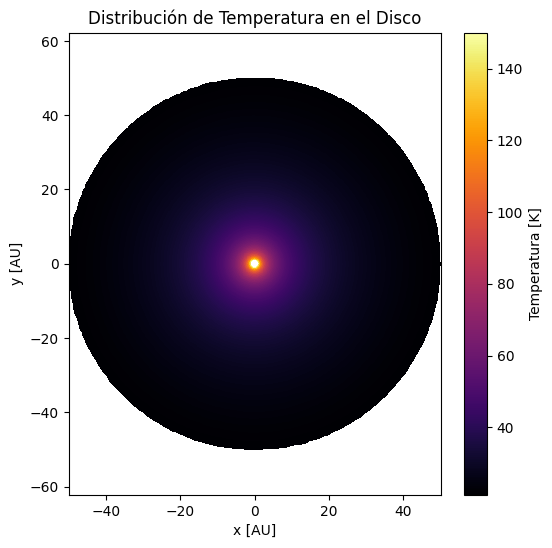

In [3]:
# Malla en coordenadas polares
R, Theta = np.meshgrid(np.linspace(1, 50, 300), np.linspace(0, 2*np.pi, 300))
Tmap = T(R)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Gráfico 2D
plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, Tmap, shading='auto', cmap='inferno')
plt.colorbar(label='Temperatura [K]')
plt.title('Distribución de Temperatura en el Disco')
plt.axis('equal')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.show()
